# Api 사용하기

네이버의 rest api를 이용해보자.

- 파파고 번역 api
- 통합검색어 트렌드 api

## 라이브러리 불러오기

In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests

%config InlineBackend.figure_formats={'png','retina'}
import matplotlib.pyplot as plt
import seaborn as sns
import json

## 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

<img src="./img/3.naver_application_button.png" height="50%" width="50%">

<img src="./img/3.naver_add_info.png" height="70%" width="70%">

In [34]:
# 애플리케이션 정보에 나오는 Client ID와 Client secret을 적어준다.
client_id = '-'
client_secret = '-'

## 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`
    
1. Document > URL
2. Requests(URL) > Response(JSON(str))
3. JSON(str) > list, dict > text

In [3]:
# 1. Document > URL
url = 'https://openapi.naver.com/v1/papago/n2mt'

In [6]:
# 2. Requests(URL) > Response(JSON(str))
ko_text = '당신을 사랑합니다.'
params = {
    'source': 'ko',
    'target': 'en',
    'text': ko_text,
}
params

{'source': 'ko', 'target': 'en', 'text': '당신을 사랑합니다.'}

In [19]:
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
}
headers

{'Content-Type': 'application/json',
 'X-Naver-Client-Id': '-',
 'X-Naver-Client-Secret': '-'}

In [11]:
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [17]:
# 3. JSON(str) > list, dict > text
en_txt = response.json()['message']['result']['translatedText']

en_txt

'I love you.'

### 깔끔하게 함수로 정리하기

In [20]:
def translate(ko_txt):
    url = 'https://openapi.naver.com/v1/papago/n2mt'
    
    client_id = '-'
    client_secret = '-'
    
    params = {
        'source': 'ko',
        'target': 'en',
        'text': ko_txt,
        }
    
    headers = {
        'Content-Type': 'application/json',
        'X-Naver-Client-Id': client_id,
        'X-Naver-Client-Secret': client_secret,
        }
    
    response = requests.post(url, json.dumps(params), headers=headers)
    
    return response.json()['message']['result']['translatedText']

## 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [24]:
# 1. URL
url = "https://openapi.naver.com/v1/datalab/search"

In [26]:
# 2. request > response
params = {
    "startDate": "2018-01-01",
    "endDate": "2023-07-31",
    "timeUnit": "month",
    "keywordGroups": [
        {"groupName": "트위터", "keywords": ["트위터", "트윗"]},
        {"groupName": "페이스북", "keywords": ["페이스북", "페북"]},
        {"groupName": "인스타그램", "keywords": ["인스타그램", "인스타"]},
    ]
}

In [27]:
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,    
}

In [28]:
response = requests.post(url, data=json.dumps(params), headers=headers)
response

<Response [200]>

In [29]:
# 3. parsing
data = response.json()["results"]

In [30]:
dfs = []
for row in data:
    df = pd.DataFrame(row["data"])
    df["title"] = row["title"] # 트위터, 페이스북, 인스타그램
    dfs.append(df)

In [31]:
# 4. preprocessing
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail(2)

,period,ratio,title
199,2023-06-01,23.92009,인스타그램
200,2023-07-01,22.59081,인스타그램


In [32]:
pivot_df = result_df.pivot("period", "title", "ratio")
pivot_df.columns = ["instagram", "twitter", "facebook"]
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2023-06-01,23.92009,23.97467,11.82617
2023-07-01,22.59081,27.22823,11.86085


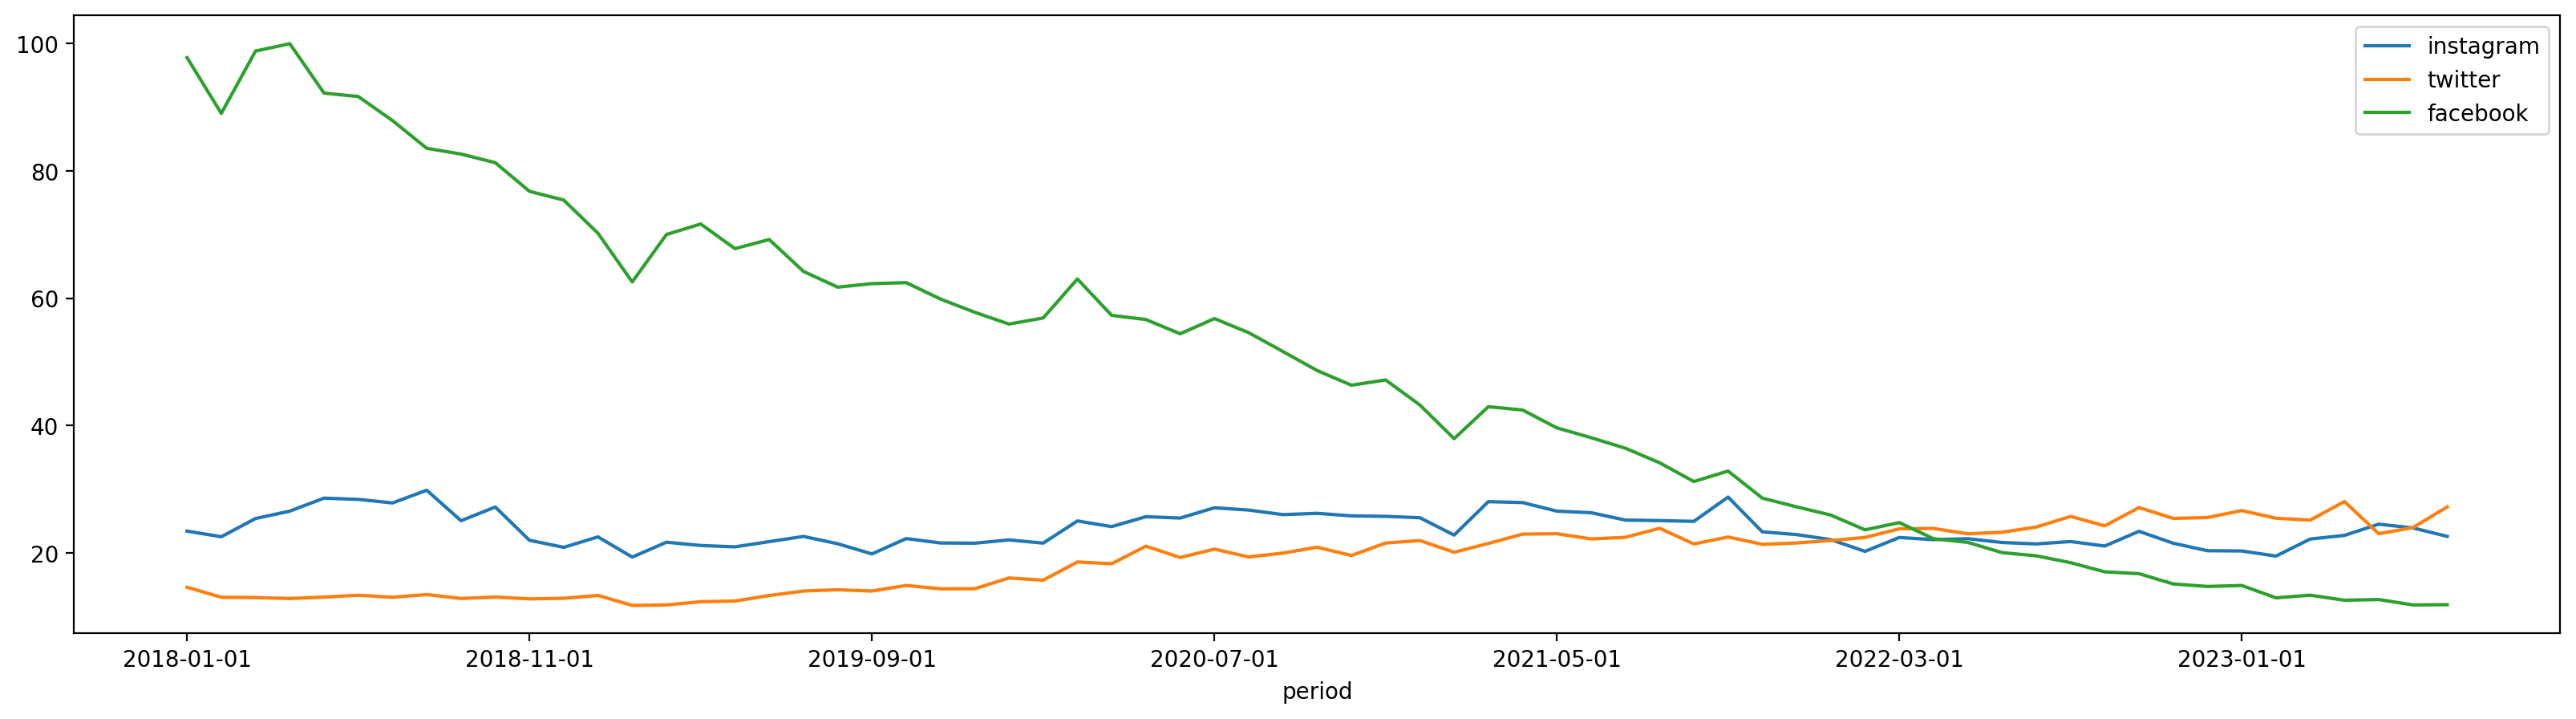

In [33]:
# 5. visualization
pivot_df.plot(figsize=(20, 5))
plt.legend(loc=0)
plt.show()